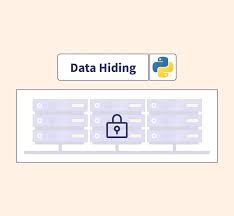

### Data Hiding:
- Data hiding is one of the important features of Object Oriented Programming which allows preventing the functions of a program to access directly the internal representation of a class type.
- By default all members of a class can be accessed outside of class.
- You can prevent this by making class members private or protected.
- In Python, we use double underscore ( ) before the attributes name to make those attributes private.
- We can use single underscore (_) before the attributes name to make those attributes protected.

In [1]:
class MyClass:
    __hiddenVar = 0 # Private member of MyClass
    _protectedVar = 0 # Protected member of MyClass

    # A member method that changes __hiddenVar
    def add(self, increment):
        MyClass.__hiddenVar += increment  # Use class name to access the private variable
        print(MyClass.__hiddenVar)

m = MyClass()
m.add(4)
m.add(6)

# This will cause an error as intended because __hiddenVar is private
# print(MyClass.__hiddenVar)

# Accessing the protected variable
print(MyClass._protectedVar)

4
10
0


In [2]:
class MyClass:
    def __init__(self):
        self.publicVar = "I am public"
        self._protectedVar = "I am protected"
        self.__privateVar = "I am private"

    def get_private_var(self):
        return self.__privateVar

    def set_private_var(self, value):
        self.__privateVar = value

# Create an instance of MyClass
m = MyClass()

# Accessing public member
print(m.publicVar)   

# Accessing protected member (by convention, should not be accessed directly)
print(m._protectedVar)   

# Accessing private member (will cause an error)
# print(m.__privateVar)  # AttributeError: 'MyClass' object has no attribute '__privateVar'

# Accessing private member via name mangling
print(m._MyClass__privateVar)   

# Using getter and setter methods to access private member
print(m.get_private_var())   
m.set_private_var("New private value")
print(m.get_private_var())  

I am public
I am protected
I am private
I am private
New private value


In [3]:
# Basic Encapsulation and Data Hiding
class Person:
    def __init__(self, name, age):
        self.name = name          # Public attribute
        self._age = age           # Protected attribute
        self.__ssn = None         # Private attribute

    def set_ssn(self, ssn):
        self.__ssn = ssn

    def get_ssn(self):
        return self.__ssn

# Creating an instance of Person
person = Person("Alice", 30)

# Accessing public attribute
print(person.name)   

# Accessing protected attribute (discouraged)
print(person._age)  

# Trying to access private attribute directly (will cause an error)
# print(person.__ssn)  # AttributeError: 'Person' object has no attribute '__ssn'

# Accessing private attribute via getter method
person.set_ssn("123-45-6789")
print(person.get_ssn())   

Alice
30
123-45-6789


In [4]:
# Data Hiding with Inheritance
class Employee:
    def __init__(self, name, salary):
        self.name = name            # Public attribute
        self.__salary = salary      # Private attribute

    def get_salary(self):
        return self.__salary

    def set_salary(self, salary):
        if salary > 0:
            self.__salary = salary
        else:
            raise ValueError("Salary must be positive")

class Manager(Employee):
    def __init__(self, name, salary, department):
        super().__init__(name, salary)
        self.department = department  # Public attribute

# Creating an instance of Manager
manager = Manager("Bob", 50000, "HR")

# Accessing public attribute
print(manager.name)   

# Accessing public attribute in subclass
print(manager.department)   

# Accessing private attribute using getter method
print(manager.get_salary())   

# Modifying private attribute using setter method
manager.set_salary(60000)
print(manager.get_salary())  

Bob
HR
50000
60000


In [5]:
# Using Properties for Encapsulation
class Account:
    def __init__(self, owner, balance):
        self.owner = owner
        self.__balance = balance

    @property
    def balance(self):
        return self.__balance

    @balance.setter
    def balance(self, amount):
        if amount < 0:
            raise ValueError("Balance cannot be negative")
        self.__balance = amount

# Creating an instance of Account
account = Account("Charlie", 1000)

# Accessing balance using property
print(account.balance)  
# Modifying balance using property setter
account.balance = 1500
print(account.balance)  

# Attempting to set a negative balance (will raise an error)
# account.balance = -500  # ValueError: Balance cannot be negative

1000
1500


In [6]:
#  Encapsulation in a Banking System
class BankAccount:
    def __init__(self, account_number, owner, balance=0):
        self.account_number = account_number  # Public attribute
        self.owner = owner                    # Public attribute
        self.__balance = balance              # Private attribute

    def deposit(self, amount):
        if amount > 0:
            self.__balance += amount
            print(f"Deposited {amount}. New balance is {self.__balance}.")
        else:
            print("Deposit amount must be positive.")

    def withdraw(self, amount):
        if amount > 0 and amount <= self.__balance:
            self.__balance -= amount
            print(f"Withdrew {amount}. New balance is {self.__balance}.")
        else:
            print("Insufficient balance or invalid amount.")

    def get_balance(self):
        return self.__balance

# Creating an instance of BankAccount
account = BankAccount("12345", "Dana", 500)

# Making deposits and withdrawals
account.deposit(200)    
account.withdraw(100)   
# Accessing balance using a getter method
print(account.get_balance())   

# Trying to access private balance directly (will cause an error)
# print(account.__balance)  # AttributeError: 'BankAccount' object has no attribute '__balance'

Deposited 200. New balance is 700.
Withdrew 100. New balance is 600.
600


In [7]:
# Encapsulation with a Library System
class Book:
    def __init__(self, title, author):
        self.title = title          # Public attribute
        self.author = author        # Public attribute
        self.__is_borrowed = False  # Private attribute

    def borrow(self):
        if not self.__is_borrowed:
            self.__is_borrowed = True
            print(f"The book '{self.title}' has been borrowed.")
        else:
            print(f"The book '{self.title}' is already borrowed.")

    def return_book(self):
        if self.__is_borrowed:
            self.__is_borrowed = False
            print(f"The book '{self.title}' has been returned.")
        else:
            print(f"The book '{self.title}' was not borrowed.")

    def is_borrowed(self):
        return self.__is_borrowed

# Creating an instance of Book
book = Book("1984", "George Orwell")

# Borrowing the book
book.borrow()
print(book.is_borrowed())

# Returning the book
book.return_book()
print(book.is_borrowed())

# Trying to access private attribute directly (will cause an error)
# print(book.__is_borrowed)

The book '1984' has been borrowed.
True
The book '1984' has been returned.
False


In [8]:
# Encapsulation with a Student Management System
class Student:
    def __init__(self, name, roll_number, grade):
        self.name = name                  # Public attribute
        self.roll_number = roll_number    # Public attribute
        self.__grade = grade              # Private attribute

    def set_grade(self, grade):
        if grade in ['A', 'B', 'C', 'D', 'F']:
            self.__grade = grade
        else:
            raise ValueError("Invalid grade")

    def get_grade(self):
        return self.__grade

# Creating an instance of Student
student = Student("John Doe", "12345", "A")

# Accessing public attributes
print(student.name)
print(student.roll_number)

# Accessing private attribute using getter method
print(student.get_grade())

# Modifying private attribute using setter method
student.set_grade("B")
print(student.get_grade())

# Trying to access private attribute directly (will cause an error)
# print(student.__grade)

John Doe
12345
A
B


In [9]:
# Encapsulation in a Vehicle System
class Vehicle:
    def __init__(self, make, model, year):
        self.make = make          # Public attribute
        self.model = model        # Public attribute
        self.__year = year        # Private attribute

    def get_year(self):
        return self.__year

    def set_year(self, year):
        if year > 1885:  # The first gasoline-powered automobile was made in 1885
            self.__year = year
        else:
            raise ValueError("Invalid year for a vehicle")

# Creating an instance of Vehicle
vehicle = Vehicle("Toyota", "Camry", 2020)

# Accessing public attributes
print(vehicle.make)
print(vehicle.model)

# Accessing private attribute using getter method
print(vehicle.get_year())

# Modifying private attribute using setter method
vehicle.set_year(2021)
print(vehicle.get_year())

# Trying to access private attribute directly (will cause an error)
# print(vehicle.__year)

Toyota
Camry
2020
2021


In [10]:
# Encapsulation with a Bank Account System
class BankAccount:
    def __init__(self, account_number, owner, balance=0):
        self.account_number = account_number  # Public attribute
        self.owner = owner                    # Public attribute
        self.__balance = balance              # Private attribute

    def deposit(self, amount):
        if amount > 0:
            self.__balance += amount
        else:
            raise ValueError("Deposit amount must be positive")

    def withdraw(self, amount):
        if 0 < amount <= self.__balance:
            self.__balance -= amount
        else:
            raise ValueError("Invalid withdrawal amount")

    def get_balance(self):
        return self.__balance

# Creating an instance of BankAccount
account = BankAccount("12345", "Alice", 1000)

# Making deposits and withdrawals
account.deposit(500)
account.withdraw(200)

# Accessing balance using getter method
print(account.get_balance())

# Trying to access private balance directly (will cause an error)
# print(account.__balance)

1300


In [11]:
# Encapsulation with a Library System
class Library:
    def __init__(self, name):
        self.name = name                    # Public attribute
        self.__books = []                   # Private attribute

    def add_book(self, book):
        self.__books.append(book)

    def remove_book(self, book):
        if book in self.__books:
            self.__books.remove(book)
        else:
            print(f"Book '{book}' not found in the library")

    def list_books(self):
        return self.__books

# Creating an instance of Library
library = Library("City Library")

# Adding and removing books
library.add_book("1984")
library.add_book("To Kill a Mockingbird")
library.remove_book("1984")

# Listing books using a public method
print(library.list_books())

# Trying to access private books list directly (will cause an error)
# print(library.__books)

['To Kill a Mockingbird']


In [12]:
# Encapsulation with a Product Inventory System
class Product:
    def __init__(self, name, price, stock):
        self.name = name          # Public attribute
        self.__price = price      # Private attribute
        self.__stock = stock      # Private attribute

    def set_price(self, price):
        if price > 0:
            self.__price = price
        else:
            raise ValueError("Price must be positive")

    def get_price(self):
        return self.__price

    def set_stock(self, stock):
        if stock >= 0:
            self.__stock = stock
        else:
            raise ValueError("Stock cannot be negative")

    def get_stock(self):
        return self.__stock

# Creating an instance of Product
product = Product("Laptop", 1000, 50)

# Accessing public attribute
print(product.name)

# Accessing and modifying private attributes using getter and setter methods
print(product.get_price())
product.set_price(1200)
print(product.get_price())

print(product.get_stock())
product.set_stock(45)
print(product.get_stock())

# Trying to access private attributes directly (will cause an error)
# print(product.__price)
# print(product.__stock)

Laptop
1000
1200
50
45


In [13]:
# Encapsulation with a Library Member System
class LibraryMember:
    def __init__(self, member_id, name):
        self.member_id = member_id    # Public attribute
        self.name = name              # Public attribute
        self.__books_borrowed = []    # Private attribute

    def borrow_book(self, book):
        self.__books_borrowed.append(book)
        print(f"{self.name} borrowed {book}")

    def return_book(self, book):
        if book in self.__books_borrowed:
            self.__books_borrowed.remove(book)
            print(f"{self.name} returned {book}")
        else:
            print(f"{self.name} has not borrowed {book}")

    def get_borrowed_books(self):
        return self.__books_borrowed

# Creating an instance of LibraryMember
member = LibraryMember("M001", "Alice")

# Borrowing and returning books
member.borrow_book("The Great Gatsby")
member.borrow_book("1984")
member.return_book("1984")

# Accessing borrowed books using a getter method
print(member.get_borrowed_books())

# Trying to access private borrowed books directly (will cause an error)
# print(member.__books_borrowed)

Alice borrowed The Great Gatsby
Alice borrowed 1984
Alice returned 1984
['The Great Gatsby']


In [14]:
# Encapsulation with a Car Rental System
class Car:
    def __init__(self, make, model, year):
        self.make = make            # Public attribute
        self.model = model          # Public attribute
        self.__year = year          # Private attribute
        self.__is_rented = False    # Private attribute

    def rent(self):
        if not self.__is_rented:
            self.__is_rented = True
            print(f"The car {self.make} {self.model} ({self.__year}) has been rented.")
        else:
            print(f"The car {self.make} {self.model} ({self.__year}) is already rented.")

    def return_car(self):
        if self.__is_rented:
            self.__is_rented = False
            print(f"The car {self.make} {self.model} ({self.__year}) has been returned.")
        else:
            print(f"The car {self.make} {self.model} ({self.__year}) was not rented.")

    def is_rented(self):
        return self.__is_rented

# Creating an instance of Car
car = Car("Toyota", "Camry", 2021)

# Renting and returning the car
car.rent()
print(car.is_rented())
car.return_car()
print(car.is_rented())

# Trying to access private attribute directly (will cause an error)
# print(car.__is_rented)

The car Toyota Camry (2021) has been rented.
True
The car Toyota Camry (2021) has been returned.
False


In [15]:
#  Encapsulation with a University Course System
class Course:
    def __init__(self, course_id, course_name):
        self.course_id = course_id             # Public attribute
        self.course_name = course_name         # Public attribute
        self.__students_enrolled = []          # Private attribute

    def enroll_student(self, student_name):
        self.__students_enrolled.append(student_name)
        print(f"{student_name} has been enrolled in {self.course_name}")

    def remove_student(self, student_name):
        if student_name in self.__students_enrolled:
            self.__students_enrolled.remove(student_name)
            print(f"{student_name} has been removed from {self.course_name}")
        else:
            print(f"{student_name} is not enrolled in {self.course_name}")

    def get_students_enrolled(self):
        return self.__students_enrolled

# Creating an instance of Course
course = Course("CS101", "Introduction to Computer Science")

# Enrolling and removing students
course.enroll_student("John Doe")
course.enroll_student("Jane Smith")
course.remove_student("John Doe")

# Accessing students enrolled using a getter method
print(course.get_students_enrolled())

# Trying to access private attribute directly (will cause an error)
# print(course.__students_enrolled)

John Doe has been enrolled in Introduction to Computer Science
Jane Smith has been enrolled in Introduction to Computer Science
John Doe has been removed from Introduction to Computer Science
['Jane Smith']


In [16]:
# Encapsulation with a Gym Membership System
class GymMember:
    def __init__(self, member_id, name, membership_type):
        self.member_id = member_id            # Public attribute
        self.name = name                      # Public attribute
        self.__membership_type = membership_type  # Private attribute
        self.__active = True                  # Private attribute

    def deactivate_membership(self):
        self.__active = False
        print(f"{self.name}'s membership has been deactivated.")

    def activate_membership(self):
        self.__active = True
        print(f"{self.name}'s membership has been activated.")

    def is_active(self):
        return self.__active

    def get_membership_type(self):
        return self.__membership_type

    def set_membership_type(self, membership_type):
        self.__membership_type = membership_type

# Creating an instance of GymMember
member = GymMember("GM001", "Alice", "Gold")

# Activating and deactivating membership
member.deactivate_membership()
print(member.is_active())
member.activate_membership()
print(member.is_active())

# Accessing and modifying membership type using getter and setter methods
print(member.get_membership_type())
member.set_membership_type("Platinum")
print(member.get_membership_type())

# Trying to access private attributes directly (will cause an error)
# print(member.__membership_type)
# print(member.__active)

Alice's membership has been deactivated.
False
Alice's membership has been activated.
True
Gold
Platinum


In [17]:
# Encapsulation with an Online Shopping Cart
class ShoppingCart:
    def __init__(self):
        self.__items = []    # Private attribute

    def add_item(self, item):
        self.__items.append(item)
        print(f"Added {item} to the shopping cart.")

    def remove_item(self, item):
        if item in self.__items:
            self.__items.remove(item)
            print(f"Removed {item} from the shopping cart.")
        else:
            print(f"{item} is not in the shopping cart.")

    def get_items(self):
        return self.__items

    def get_total_items(self):
        return len(self.__items)

# Creating an instance of ShoppingCart
cart = ShoppingCart()

# Adding and removing items
cart.add_item("Laptop")
cart.add_item("Smartphone")
cart.remove_item("Laptop")

# Accessing items using getter methods
print(cart.get_items())
print(cart.get_total_items())

# Trying to access private attribute directly (will cause an error)
# print(cart.__items)

Added Laptop to the shopping cart.
Added Smartphone to the shopping cart.
Removed Laptop from the shopping cart.
['Smartphone']
1


In [18]:
print("------"*5, 'THE END', "------"*5)

------------------------------ THE END ------------------------------


Author: [Moguloju_Sai](https://linktr.ee/Moguloju_Sai)